<a href="https://colab.research.google.com/github/CalebMitchel/Imse-441/blob/main/Lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import math
import statistics
import numpy as np
import scipy.stats
from scipy import stats
from scipy.stats import f_oneway
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as mc

In [16]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


Saving 2Lab3_SQC.csv to 2Lab3_SQC.csv
User uploaded file "2Lab3_SQC.csv" with length 226 bytes


In [17]:
import pandas as pd
data1 = pd.read_csv('2Lab3_SQC.csv', sep=',', na_values=".")
data1

,Observation,Flow,Uniformity
0,1,125,2.7
1,2,125,2.6
2,3,125,4.6
3,4,125,3.2
4,5,125,3.0
5,6,125,3.8
6,1,160,4.6
7,2,160,4.9
8,3,160,5.0
9,4,160,4.2


In [18]:
FlowRate125=data1[data1['Flow']==125]['Uniformity']
FlowRate125

0    2.7
1    2.6
2    4.6
3    3.2
4    3.0
5    3.8
Name: Uniformity, dtype: float64

In [19]:
FlowRate160=data1[data1['Flow']==160]['Uniformity']
FlowRate160

6     4.6
7     4.9
8     5.0
9     4.2
10    3.6
11    4.2
Name: Uniformity, dtype: float64

In [20]:
FlowRate200=data1[data1['Flow']==200]['Uniformity']
FlowRate200

12    4.6
13    2.9
14    3.4
15    3.5
16    4.1
17    5.1
Name: Uniformity, dtype: float64

In [21]:
FlowRate125=data1[data1['Flow']==125]['Uniformity']
FlowRate160=data1[data1['Flow']==160]['Uniformity']
FlowRate200=data1[data1['Flow']==200]['Uniformity']

In [22]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Observation  18 non-null     int64  
 1   Flow         18 non-null     int64  
 2   Uniformity   18 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 560.0 bytes


In [23]:
stat, p = f_oneway(FlowRate125, FlowRate160, FlowRate200)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
  print('Likely the same distribution')
else:
  print('Likely a different distribution')

stat=3.586, p=0.053
Likely the same distribution


A) Flow rate doesn't effect the etch uniformity. F-test found that .053 was our p-value. P-value>alpha it is not statistically significant, fail to reject null hypothisis

In [24]:
model = ols('Uniformity ~ C(Flow)', data= data1).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table


,sum_sq,df,F,PR(>F)
C(Flow),3.647778,2.0,3.585627,0.053365
Residual,7.630000,15.0,NaN,NaN


In [25]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Uniformity   R-squared:                       0.323
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     3.586
Date:                Wed, 27 Sep 2023   Prob (F-statistic):             0.0534
Time:                        05:47:10   Log-Likelihood:                -17.816
No. Observations:                  18   AIC:                             41.63
Df Residuals:                      15   BIC:                             44.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.3167      0.291     11.

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [26]:
def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']

    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)']
    aov = aov[cols]
    return aov

anova_table(aov_table)

,sum_sq,df,mean_sq,F,PR(>F)
C(Flow),3.647778,2.0,1.823889,3.585627,0.053365
Residual,7.630000,15.0,0.508667,NaN,NaN


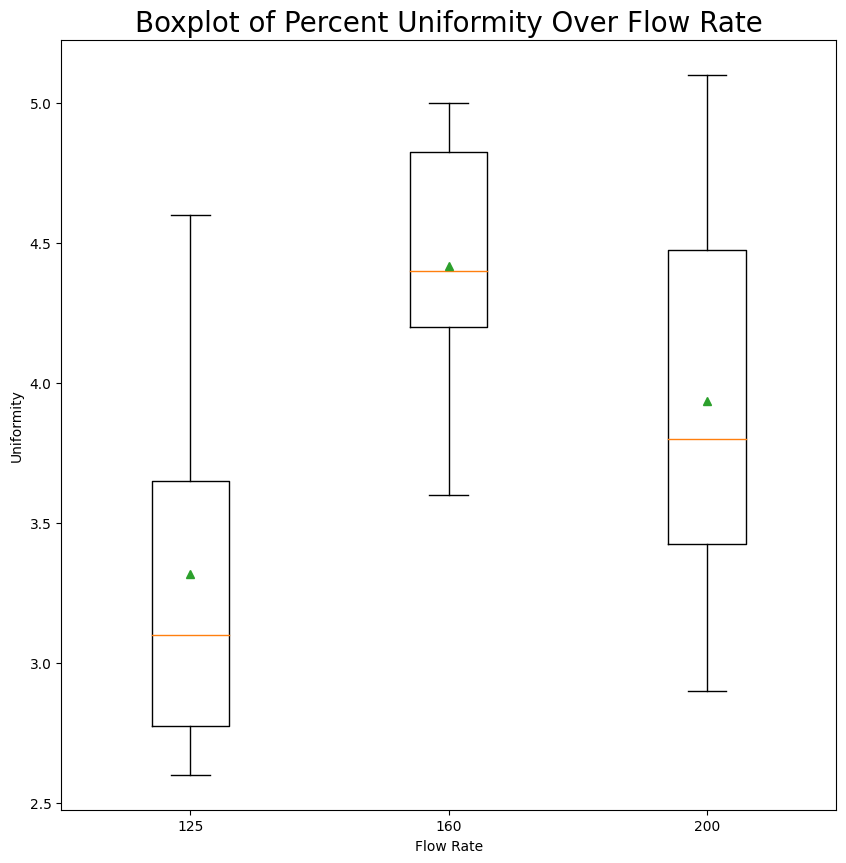

In [27]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)


ax.set_title("Boxplot of Percent Uniformity Over Flow Rate" , fontsize= 20)
ax.set


data1=[FlowRate125, FlowRate160, FlowRate200]

ax.boxplot(data1,
           labels= ['125', '160', '200'], showmeans= True)

plt.xlabel("Flow Rate")
plt.ylabel("Uniformity")

plt.show()

B) Construct a box plot of the etch uniformity data. Use this plot, together with the analysis of variance results, to determine which gas flow rate would be best in terms of etch uniformity (a small percentage is best).

Initially, my earlier analysis indicated that there wasn't a statistically significant difference in variance among the various flow rates. This suggests that the variance is consistent across all flow rates. So, we aim to choose the flow rate with the lowest etch percent uniformity, which, in this case, is 125.

In [29]:
prediction=model.predict()
prediction

array([3.31666667, 3.31666667, 3.31666667, 3.31666667, 3.31666667,
       3.31666667, 4.41666667, 4.41666667, 4.41666667, 4.41666667,
       4.41666667, 4.41666667, 3.93333333, 3.93333333, 3.93333333,
       3.93333333, 3.93333333, 3.93333333])

In [32]:
model.rsquared

0.32344827586206915

In [33]:
model.rsquared_adj

0.23324137931034505

In [34]:
residuals=model.resid
residuals

0    -0.616667
1    -0.716667
2     1.283333
3    -0.116667
4    -0.316667
5     0.483333
6     0.183333
7     0.483333
8     0.583333
9    -0.216667
10   -0.816667
11   -0.216667
12    0.666667
13   -1.033333
14   -0.533333
15   -0.433333
16    0.166667
17    1.166667
dtype: float64

In [35]:
se= model.mse_resid
se

0.5086666666666665

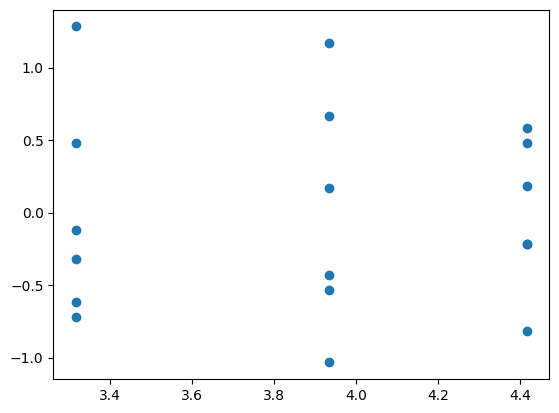

In [36]:
plt.scatter(prediction, residuals)

plt.show()

C) Plot the residuals versus predicted flow. Interpret this plot

The plot depicting the residuals versus the predicted values exhibits an approximate normal distribution. The standard error measures roughly 0.5, indicating the degree of separation between the data points on the plot.

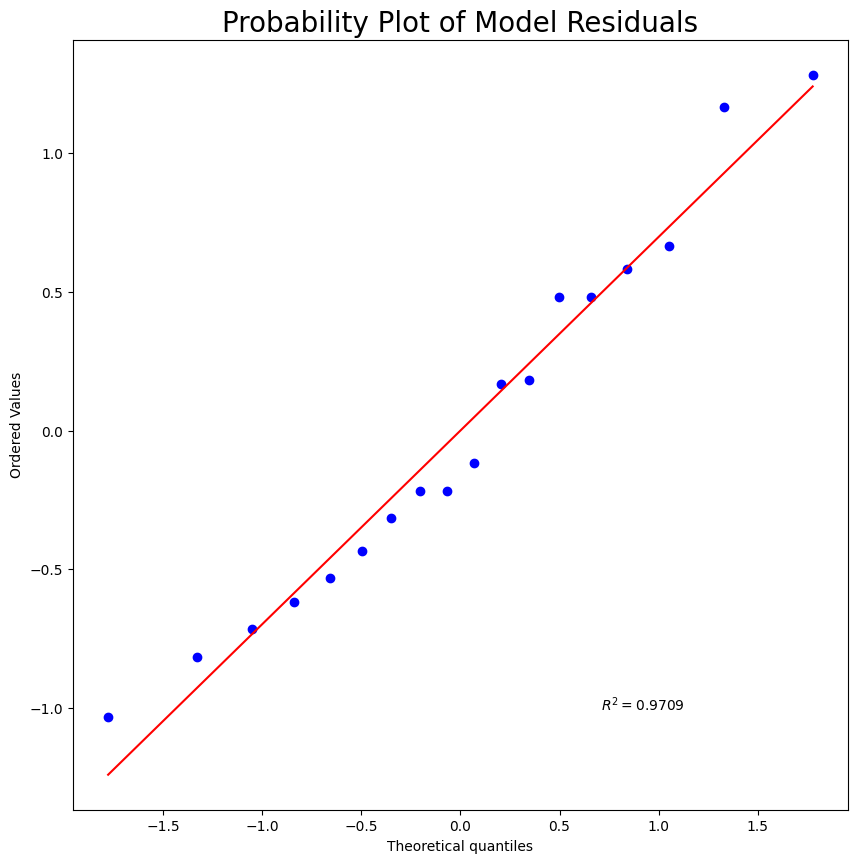

In [37]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(model.resid, plot= plt, rvalue= True)
ax.set_title("Probability Plot of Model Residuals", fontsize= 20)
ax.set

plt.show()

D) Does the normality assumption seem reasonable in this problem?

The normality assumption seems reasonable in the problem.

In [38]:
mean1= FlowRate125.mean()
mean1

3.316666666666667

In [39]:
mean2= FlowRate160.mean()
mean2

4.416666666666667

In [40]:
mean3= FlowRate200.mean()
mean3

3.9333333333333336

In [41]:
resmean2 = 	0.5086666666666665
n = 6
scale = math.sqrt(resmean2/n)
scale

0.291166237358966

In [42]:
mean1, mean2, mean3

(3.316666666666667, 4.416666666666667, 3.9333333333333336)

<Axes: ylabel='Density'>

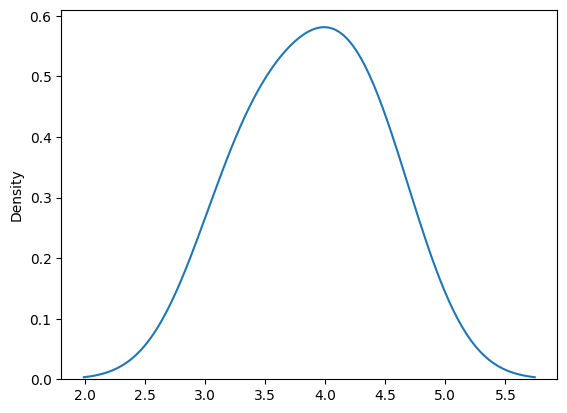

In [43]:
import seaborn as sns
sns.kdeplot((mean1, mean2, mean3))

4.36) Does this analysis indicate that there are differences in mean etch uniformity at the different flow rates? Which flows produce different results?

Upon adjusting the t-test with a scaling factor of 0.3, the resulting distribution curve resembles a typical bell-shaped, normal curve. This observation implies that there is equality in variance among the various flow rates, consequently indicating equality in means as well.

In [44]:
X = 31.400
m = 30
se_mean = .336
z = (X-m)/se_mean
z

4.1666666666666625

In [45]:
p_value = scipy.stats.norm.sf(abs(z))*2
p_value

3.09085937645925e-05

A) Fill in the missing values. What conclusions would you draw? Z is equal to 4.1666666666666625 and the p-value is 3.09085937645925e-05.

B) Is this a one-sided or two-sided test? Two-sided test

In [46]:
meanCI = 31.400
SD = 0.336
stats.t.interval(0.95, df=14, loc=31.400, scale=0.336)

(30.679351672859912, 32.12064832714009)

C) Use the output and a normal table to find a 95% CI on the mean.
(30.679351672859912, 32.12064832714009)

D) How was the SE mean calculated?
It was given in the problem.

In [48]:
p_value = scipy.stats.norm.sf(abs(z))
p_value

1.545429688229625e-05

E) What would the p-value be if the alternative hypothesis is mu is greater than 30?

1.545429688229625e-05

3)

4.47)

In [57]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving AED_SQC.csv to AED_SQC.csv
User uploaded file "AED_SQC.csv" with length 238 bytes


In [58]:
data2 = pd.read_csv('AED_SQC.csv', sep=',', na_values=".")
data2

,Horsepower,rpm,Octane,Compression
0,225,2000,90,100
1,212,1800,94,95
2,229,1400,88,110
3,222,1900,91,96
4,219,1600,86,100
5,278,2500,96,110
6,246,3000,94,98
7,237,3200,90,100
8,233,2800,88,105
9,224,3400,86,97


In [67]:
import pandas as pd
import matplotlib.ticker
!pip


Usage:   
  pip3 <command> [options]

Commands:
  install                     Install packages.
  download                    Download packages.
  uninstall                   Uninstall packages.
  freeze                      Output installed packages in requirements format.
  inspect                     Inspect the python environment.
  list                        List installed packages.
  show                        Show information about installed packages.
  check                       Verify installed packages have compatible dependencies.
  config                      Manage local and global configuration.
  search                      Search PyPI for packages.
  cache                       Inspect and manage pip's wheel cache.
  index                       Inspect information available from package indexes.
  wheel                       Build wheels from your requirements.
  hash                        Compute hashes of package archives.
  completion                  A helper c

In [69]:
from matplotlib import rcParams
Horsepower = data2['Horsepower']
rpm = data2['rpm']
Octane = data2['Octane']
Compression = data2['Compression']

In [70]:
model2 = ols('Horsepower ~ Compression + rpm + Octane', data=data2).fit()
aov_table2 = sm.stats.anova_lm(model2, typ=2)
aov_table2

,sum_sq,df,F,PR(>F)
Compression,1342.193866,1.0,24.968495,0.001057
rpm,634.665015,1.0,11.806514,0.008875
Octane,926.275572,1.0,17.231271,0.003204
Residual,430.043982,8.0,NaN,NaN


In [71]:
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:             Horsepower   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     17.24
Date:                Wed, 27 Sep 2023   Prob (F-statistic):           0.000748
Time:                        06:39:01   Log-Likelihood:                -38.501
No. Observations:                  12   AIC:                             85.00
Df Residuals:                       8   BIC:                             86.94
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -282.4966     77.551     -3.643      

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


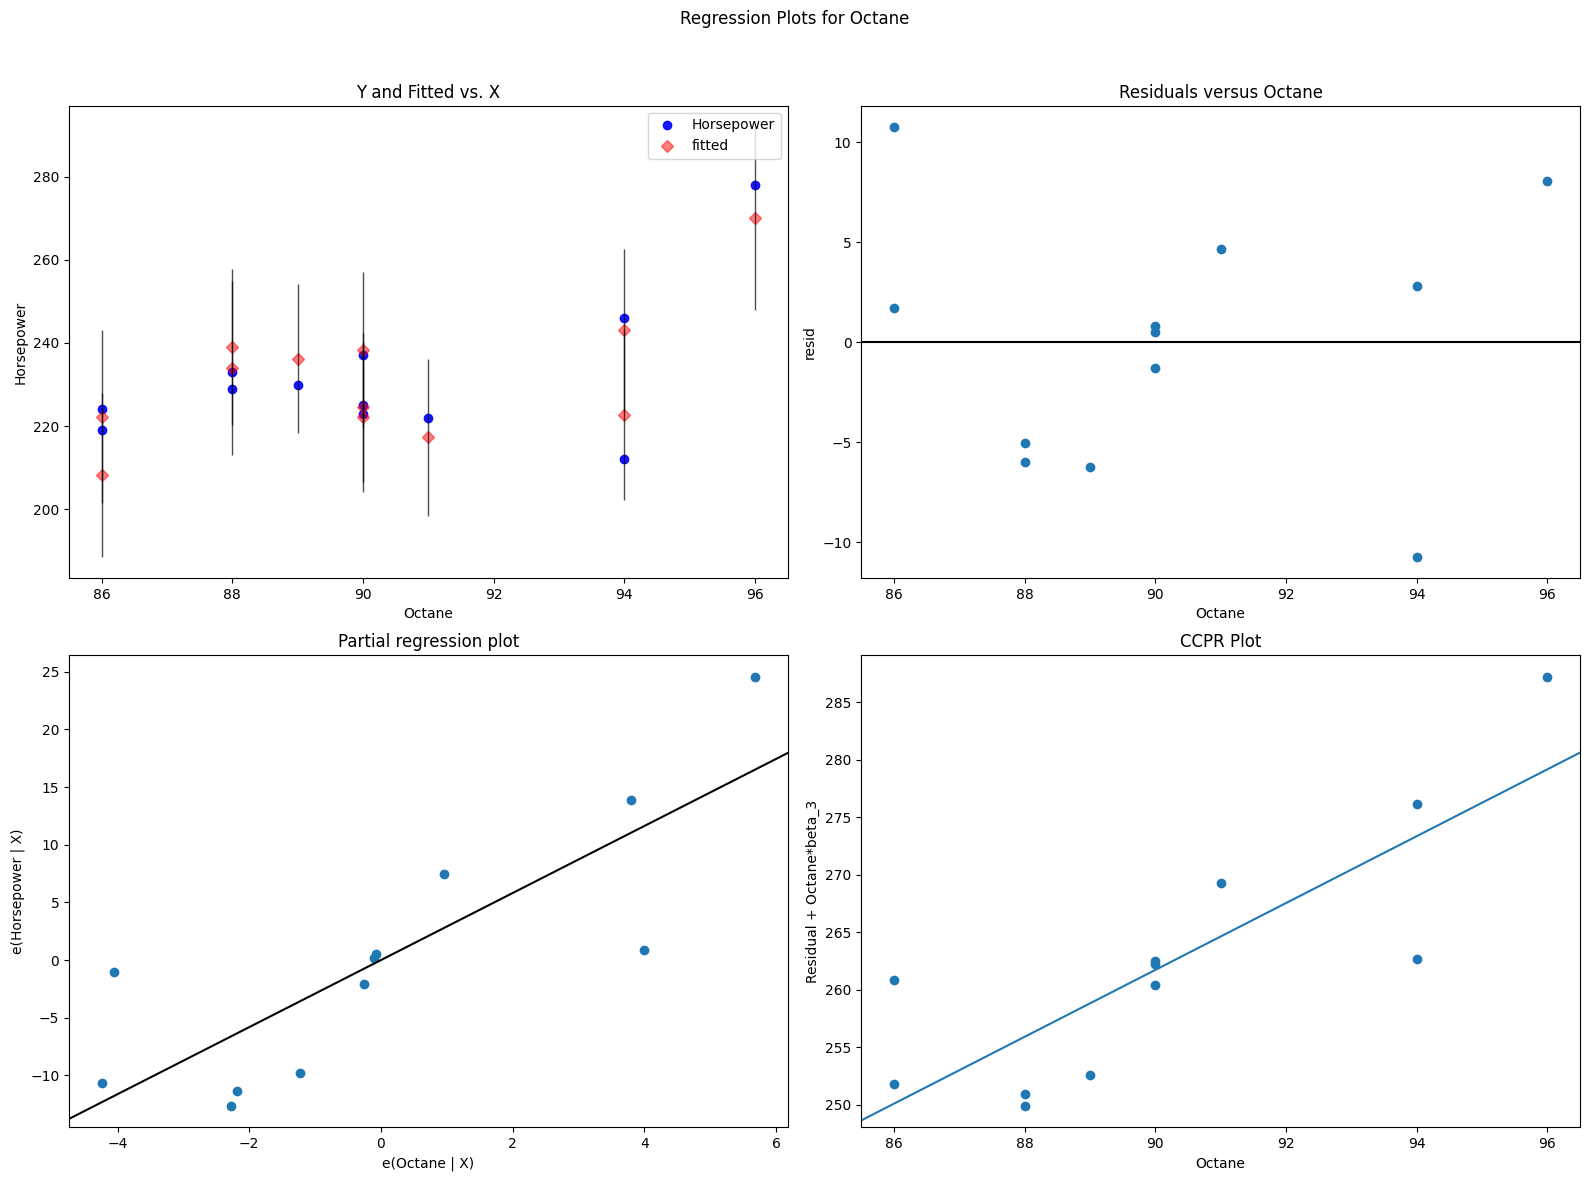

In [72]:
fig = plt.figure(figsize=(16,12))
fig = sm.graphics.plot_regress_exog(model2, 'Octane', fig=fig)

A) Pictured above

B)The f-test produces a f-statistic of 11.12. This means we will have low p-values.

C) Yes since all three regressor variables are below alpha of 0.05. They are all statistically signifigant.